<a href="https://colab.research.google.com/github/nehaansiddiqua/ML_workshop/blob/main/Bootsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40,
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41,
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37,
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

In [3]:
dataset = pd.DataFrame(data)

In [4]:
dataset = pd.read_csv('input.csv')

In [5]:
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [6]:
#train a model such that we get boot size from harness size

In [7]:
import statsmodels.formula.api as smf

In [8]:
formula = "boot_size ~ harness_size" #a formula generated meaning boot size is determined form harness size

In [9]:
model = smf.ols(formula=formula, data = dataset)

In [10]:
if not hasattr(model, 'params'):
  print("Model is selected but it doesnt have parameters set. We need to train it!")

Model is selected but it doesnt have parameters set. We need to train it!


In [11]:
#now we train our model

In [12]:
fitted_model = model.fit()

In [13]:
print("The following parameters have been found:\n"+
      f"Line Slope: {fitted_model.params[1]}\n"+
      f"Line Intercept: {fitted_model.params[0]}")

The following parameters have been found:
Line Slope: 0.585925416738271
Line Intercept: 5.71910981268259


In [14]:
import matplotlib.pyplot as plt


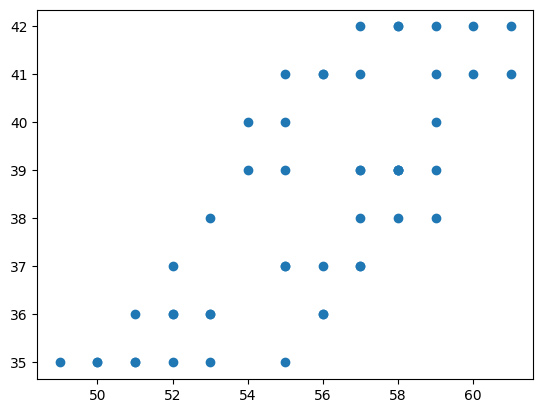

In [15]:
plt.scatter(dataset['harness_size'], dataset['boot_size'])

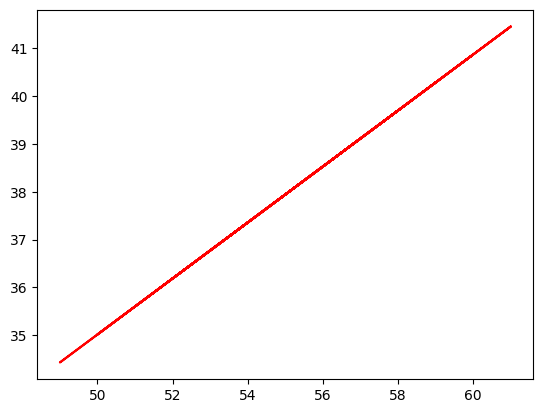

In [16]:
plt.plot(dataset["harness_size"], fitted_model.params[1]*dataset["harness_size"] + fitted_model.params[0], 'r', label = "fitted line")

#fitted_model.params[1]*dataset["harness_size"] + fitted_model.params[0] this is simple equation of the line y = mx + c
# here fitted_model.params[1] is slope and fitted_model.params[0] is the intercept


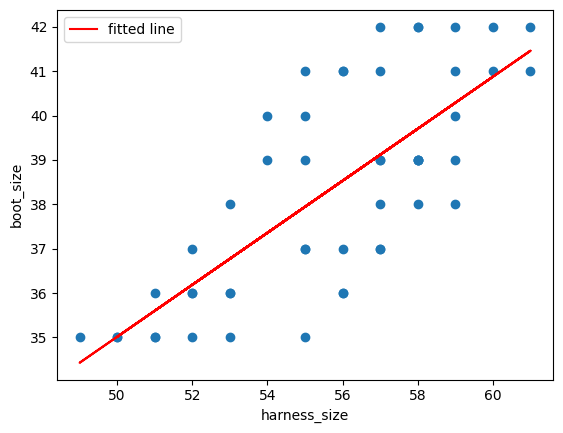

In [17]:
plt.scatter(dataset['harness_size'], dataset['boot_size'])
plt.plot(dataset["harness_size"], fitted_model.params[1]*dataset["harness_size"] + fitted_model.params[0], 'r', label = "fitted line")
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [18]:
harness_size = {'harness_size':[58]}
approximate_bootsize = fitted_model.predict(harness_size)
print(approximate_bootsize)

0    39.702784
dtype: float64


In [19]:
harness_size = {'harness_size':[52.5]}
approximate_bootsize = fitted_model.predict(harness_size)
print(approximate_bootsize)

0    36.480194
dtype: float64


In [20]:
print("Estimated boot size is: ")
print(approximate_bootsize)

Estimated boot size is: 
0    36.480194
dtype: float64


In [21]:
import numpy as np
from sklearn import metrics

In [22]:
approximate_size = fitted_model.predict(dataset['harness_size'])

In [23]:
x = dataset["harness_size"]

y = dataset["boot_size"]


In [24]:
# EVALUATION METRIICS

In [25]:
rmse = np.sqrt(metrics.mean_squared_error(y, approximate_size))
print('RMSE:', rmse)

RMSE: 1.5560397381202649


In [26]:
print("Average cost: ",y.mean)

Average cost:  <bound method NDFrame._add_numeric_operations.<locals>.mean of 0     39
1     38
2     37
3     39
4     38
5     35
6     37
7     36
8     35
9     40
10    40
11    36
12    38
13    39
14    42
15    42
16    36
17    36
18    35
19    41
20    42
21    38
22    37
23    35
24    40
25    36
26    35
27    39
28    41
29    37
30    35
31    41
32    39
33    41
34    42
35    42
36    36
37    37
38    37
39    39
40    42
41    35
42    36
43    41
44    41
45    41
46    39
47    39
48    35
49    39
Name: boot_size, dtype: int64>
